In [1]:
# import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns


In [2]:
#importing train data 
df_train = pd.read_excel('Data_Train.xlsx')

In [3]:
#importing test data
df_test = pd.read_excel('Test_set.xlsx')

In [4]:
#combaining both train and test
df_new = pd.concat([df_train, df_test])
df = df_new

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


#     -------------------------------Data Cleaning --------------------------------

# HANDELING NULL VALUES

In [6]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

Price column has 2671 null values

In [10]:
df['Price'].unique()


array([ 3897.,  7662., 13882., ..., 12352., 12648.,    nan])

In [7]:
df[df['Price'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,NaN
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,NaN
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,NaN
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,NaN
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


Above rows contains null values in price column

In [8]:
df['Price']= df['Price'].fillna(df['Price'].mode()[0])

In [9]:
df['Price'].isnull().sum()

np.int64(0)

In [10]:
df['Total_Stops'].isnull().sum()

np.int64(1)

In [11]:
df[df['Total_Stops'].isnull()]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [12]:
df.drop(9039 ,axis=0,inplace=True)

# DEALING Duplicates Rows

In [13]:

columns_to_check = [
    'Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
    'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']

# Droping duplicates based on the specified columns, keeping only the last occurrence
cleaned_df = df.drop_duplicates(subset=columns_to_check, keep='last')

# Reseting index 
cleaned_df = cleaned_df.reset_index(drop=True)


In [14]:
df = cleaned_df

# Feature Engineering

***Create New Features: Based on existing data***

In [15]:
#Extracting Date, Month ,Year columns from Date_of_Journey COLUMN
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [16]:
#Extracting Min,Home columns from Arrival_Time COLUMN
df['Arrival_Time']=df['Arrival_Time'].str.split(" ").str[0]
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[0]

In [17]:
df['Duration_hrs']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [18]:
df['Dep_Time_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_min']=df['Dep_Time'].str.split(':').str[1]


In [19]:
##before
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [20]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop' : 0,'2 stops': 2,'1 stop': 1,'3 stops':3,'4 stops':4})

In [21]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [22]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

# Correcting Data Types

In [23]:
#Converting Object Dtype to INT
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [24]:
df['Arrival_min']=df['Arrival_min'].astype(int)
df['Arrival_hour']=df['Arrival_hour'].astype(int)

In [25]:
df['Dep_Time_hour']=df['Dep_Time_hour'].astype(int)
df['Dep_Time_min']=df['Dep_Time_min'].astype(int)

# "Filtering out unneeded variables"

In [26]:
df.drop('Dep_Time' ,axis=1,inplace=True)

In [27]:
df.drop('Arrival_Time' ,axis=1,inplace=True)

In [28]:
df.drop('Duration' ,axis=1,inplace=True)

In [29]:
df.drop('Date_of_Journey' ,axis=1,inplace=True)

In [30]:
df.drop('Route' ,axis=1,inplace=True)

In [31]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Duration_hrs       0
Dep_Time_hour      0
Dep_Time_min       0
dtype: int64

In [32]:
df[df['Duration_hrs'] == '5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min
6021,Air India,Mumbai,Hyderabad,2,No info,17327.0,6,3,2019,16,16,5m,16,50
12692,Air India,Mumbai,Hyderabad,2,No info,10262.0,12,3,2019,16,16,5m,16,50


In [33]:
df.drop(6021 ,axis=0,inplace=True)
df.drop(12692 ,axis=0,inplace=True)
df['Duration_hrs']=df['Duration_hrs'].astype(int)

In [34]:
df[df['Duration_hrs'] == '5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12701 entries, 0 to 12702
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          12701 non-null  object 
 1   Source           12701 non-null  object 
 2   Destination      12701 non-null  object 
 3   Total_Stops      12701 non-null  int64  
 4   Additional_Info  12701 non-null  object 
 5   Price            12701 non-null  float64
 6   Date             12701 non-null  int64  
 7   Month            12701 non-null  int64  
 8   Year             12701 non-null  int64  
 9   Arrival_hour     12701 non-null  int64  
 10  Arrival_min      12701 non-null  int64  
 11  Duration_hrs     12701 non-null  int64  
 12  Dep_Time_hour    12701 non-null  int64  
 13  Dep_Time_min     12701 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.5+ MB


In [147]:
# Exporting the DataFrame to a CSV file
df.to_csv('flight_data.csv', index=False)


In [36]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,1,2,22,20
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,13,7,5,50
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,4,19,9,25
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,23,5,18,5
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,21,4,16,50
5,SpiceJet,Kolkata,Banglore,0,No info,3873.0,24,6,2019,11,11,2,9,0
6,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087.0,12,3,2019,10,10,15,18,55
7,Jet Airways,Banglore,New Delhi,1,No info,22270.0,1,3,2019,5,5,21,8,0
8,Jet Airways,Banglore,New Delhi,1,In-flight meal not included,11087.0,12,3,2019,10,10,25,8,55
9,Multiple carriers,Delhi,Cochin,1,No info,8625.0,27,5,2019,19,19,7,11,25


# Data Analysis

***Descriptive Statistics: Calculate summary statistics for numerical*** 

In [39]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min
count,12701.000000,12701.000000,12701.000000,12701.000000,12701.0,12701.000000,12701.000000,12701.000000,12701.000000,12701.000000
mean,0.792379,9231.678765,13.285962,4.711755,2019.0,13.445477,13.445477,9.897488,12.523660,24.717345
std,0.652162,4165.109502,8.412324,1.158934,0.0,6.869501,6.869501,8.289689,5.722508,18.856452
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,6069.000000,6.000000,3.000000,2019.0,8.000000,8.000000,2.000000,8.000000,5.000000
50%,1.000000,10262.000000,12.000000,5.000000,2019.0,14.000000,14.000000,8.000000,12.000000,25.000000
75%,1.000000,10844.000000,21.000000,6.000000,2019.0,19.000000,19.000000,15.000000,18.000000,40.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,23.000000,47.000000,23.000000,55.000000


***Data Visualization: Use plots to understand the distribution and relationships in the data.***

# Average Price by Airline

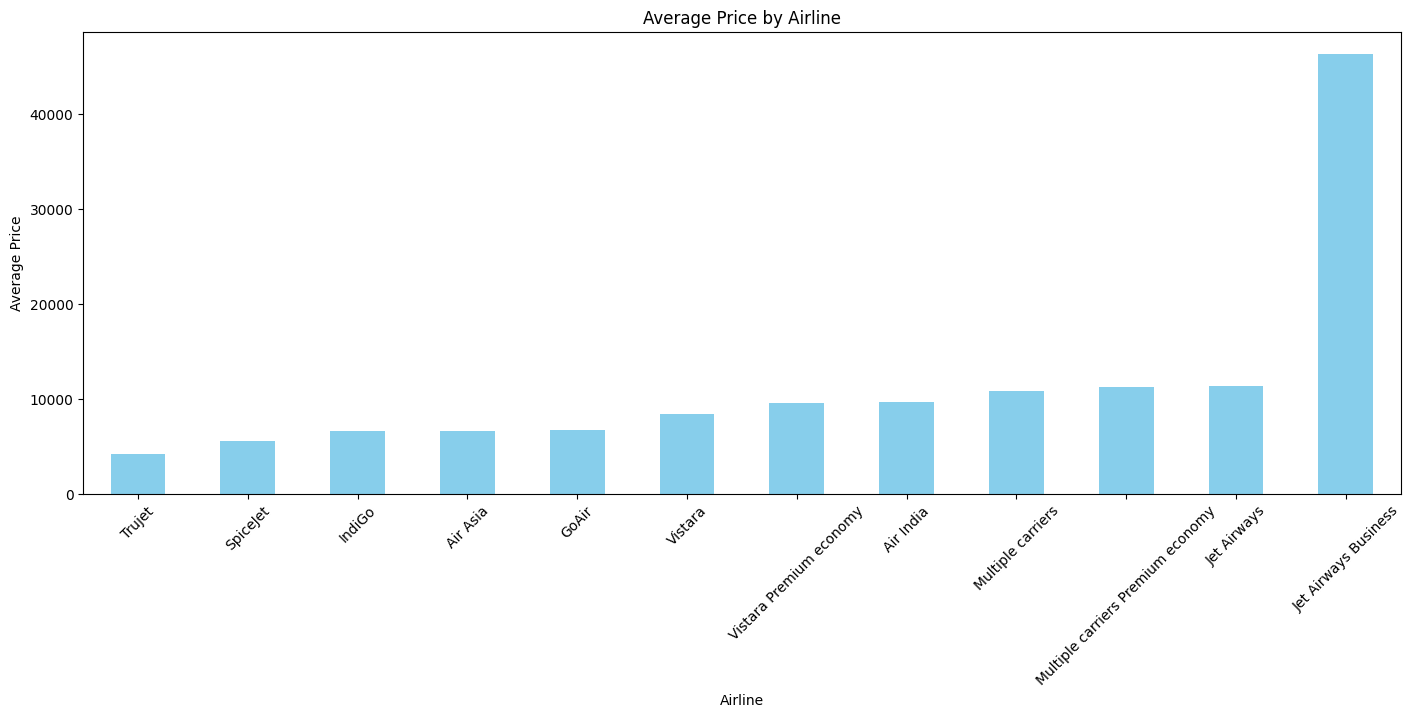

In [43]:
# Group by Airline and calculating the mean price
avg_price_by_airline = df.groupby('Airline')['Price'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(17, 6))
avg_price_by_airline.plot(kind='bar', color='skyblue')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


# Most Expensive Flight

In [45]:
most_expensive_flight = df[df['Price'] == df['Price'].max()]
most_expensive_flight


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min
2691,Jet Airways Business,Banglore,New Delhi,1,Business class,79512.0,1,3,2019,11,11,5,5,45


# Total Flights by Source

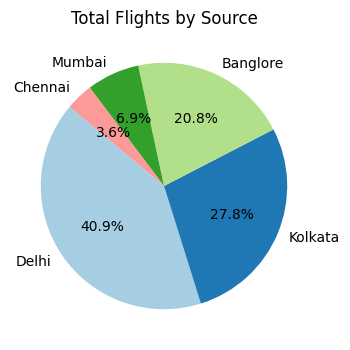

In [72]:
# Count the number of flights from each source
flights_by_source = df['Source'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
flights_by_source.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Total Flights by Source')
plt.ylabel('')
plt.show()


# Flight Count by Month

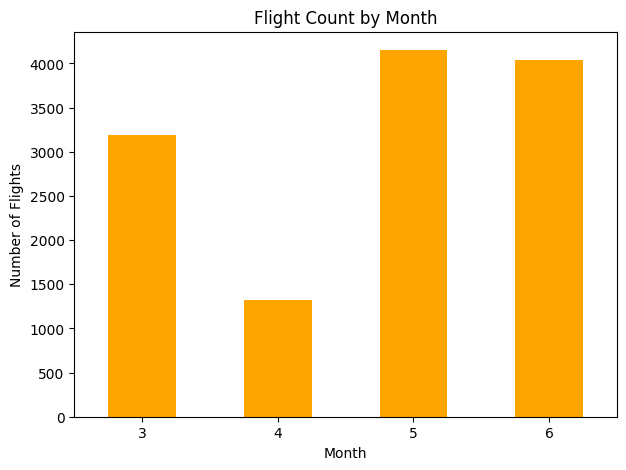

In [73]:
# Count the number of flights in each month
flights_by_month = df['Month'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(7, 5))
flights_by_month.plot(kind='bar', color='orange')
plt.title('Flight Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)
plt.show()


 # Average Flight Duration by Airline

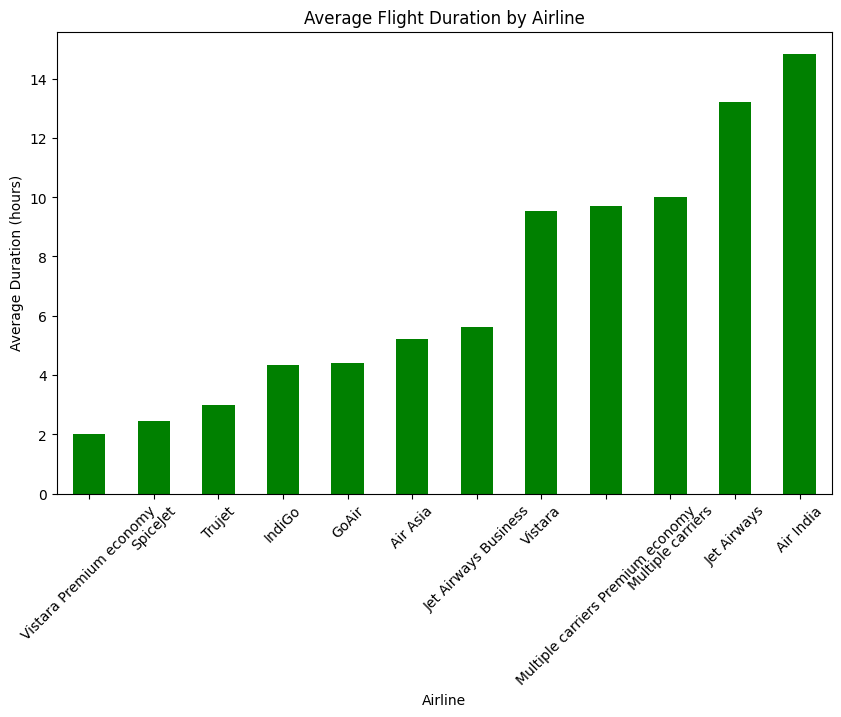

In [47]:
# Group by Airline and calculate the mean duration
avg_duration_by_airline = df.groupby('Airline')['Duration_hrs'].mean().sort_values()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
avg_duration_by_airline.plot(kind='bar', color='green')
plt.title('Average Flight Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()


 # Cheapest Flight

In [75]:
cheapest_flight = df[df['Price'] == df['Price'].min()]
cheapest_flight


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Duration_hrs,Dep_Time_hour,Dep_Time_min
3757,SpiceJet,Mumbai,Hyderabad,0,No info,1759.0,21,3,2019,0,0,1,22,45
3952,SpiceJet,Mumbai,Hyderabad,0,No info,1759.0,27,3,2019,0,0,1,22,45
4480,SpiceJet,Mumbai,Hyderabad,0,No info,1759.0,3,4,2019,0,0,1,22,45
9891,SpiceJet,Mumbai,Hyderabad,0,No info,1759.0,27,3,2019,7,7,1,5,45


# Average Price by Source-Destination Pair

In [76]:
avg_price_by_route = df.groupby(['Source', 'Destination'])['Price'].mean().reset_index()
avg_price_by_route


,Source,Destination,Price
0,Banglore,Delhi,6169.475980
1,Banglore,New Delhi,12073.321023
2,Chennai,Kolkata,5689.910088
3,Delhi,Cochin,10360.669871
4,Kolkata,Banglore,9320.230071
5,Mumbai,Hyderabad,6138.206583


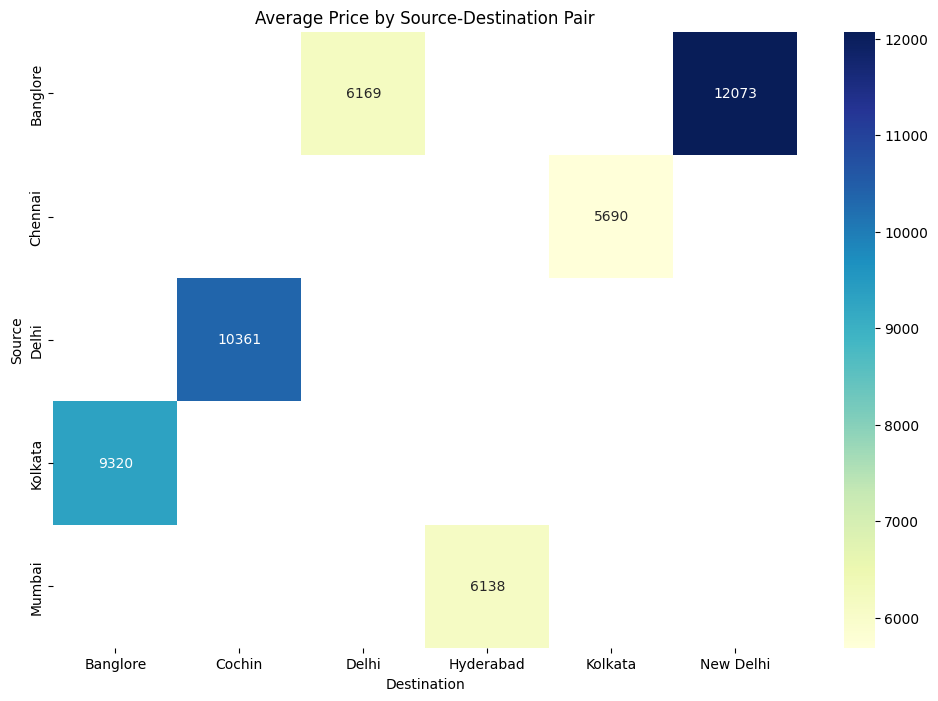

In [77]:
# Creating a pivot table
pivot_price_by_route = pd.pivot_table(df, values='Price', index='Source', columns='Destination', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_price_by_route, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Price by Source-Destination Pair')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()


In [57]:
flights_by_info = df['Additional_Info'].value_counts()
flights_by_info


Additional_Info
No info                         9939
In-flight meal not included     2333
No check-in baggage included     390
1 Long layover                    20
Change airports                    8
Business class                     5
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [79]:
# Distribution of Flight Prices

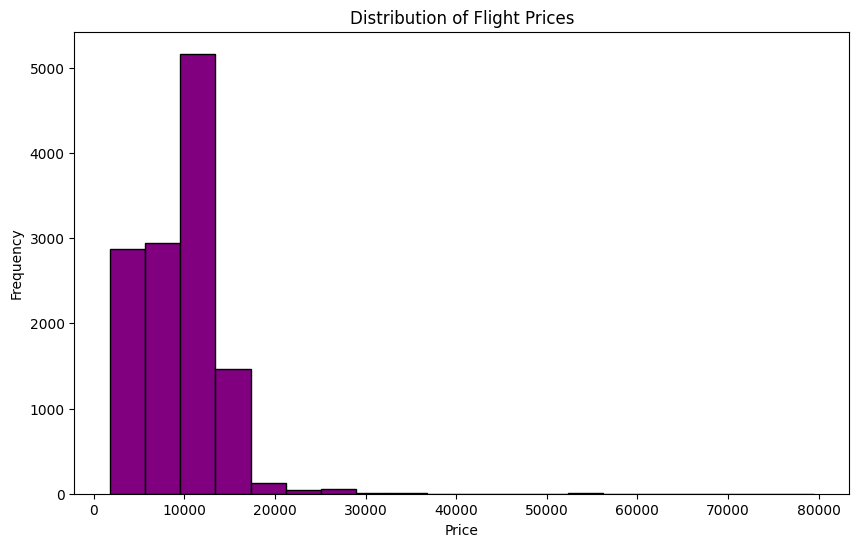

In [80]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
df['Price'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Flight Price vs. Duration Scatter Plot
This can show the relationship between flight duration and price.

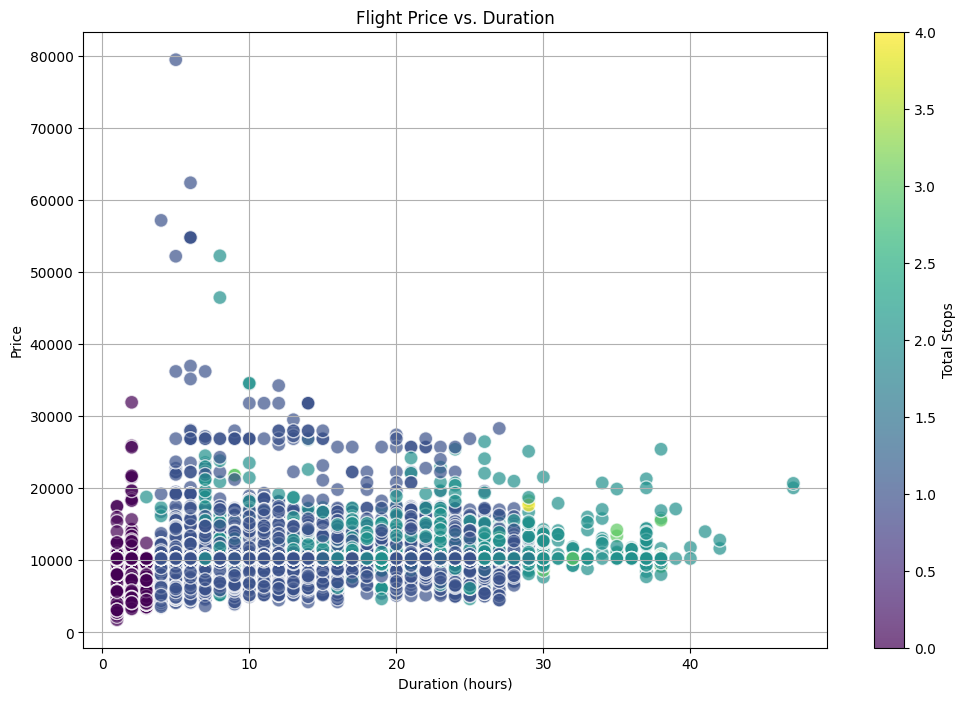

In [92]:
plt.figure(figsize=(12, 8))
plt.scatter(df['Duration_hrs'], df['Price'], alpha=0.7, c=df['Total_Stops'], cmap='viridis', edgecolors='w', s=100)
plt.colorbar(label='Total Stops')
plt.title('Flight Price vs. Duration')
plt.xlabel('Duration (hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [ ]:
Pairwise Relationships (Pairplot)
This can be useful for exploring relationships between multiple numerical variables.

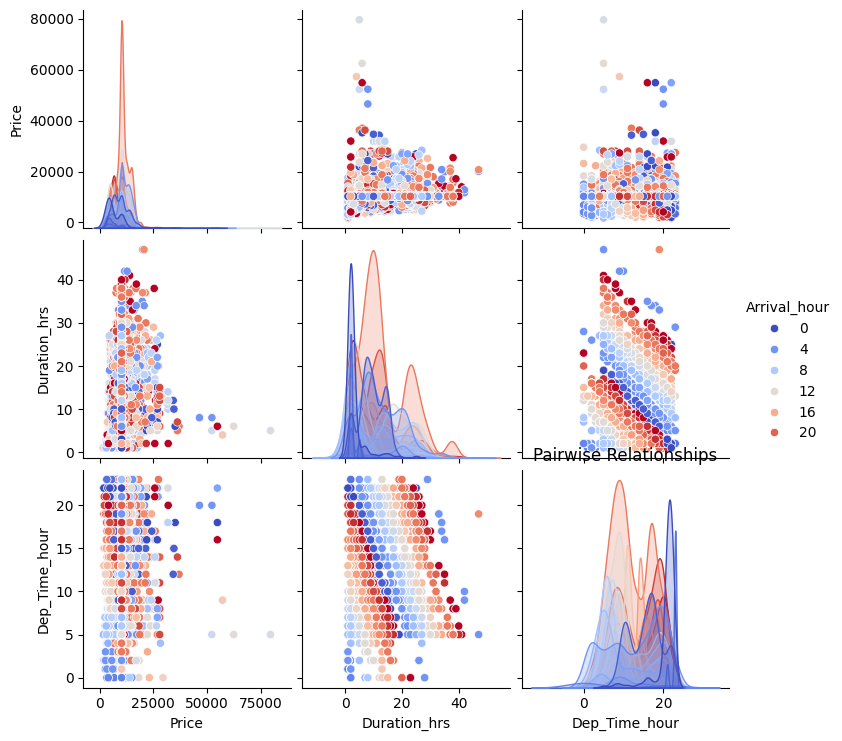

In [61]:
import seaborn as sns

# Selecting relevant columns
df_pairplot = df[['Price', 'Duration_hrs', 'Arrival_hour', 'Dep_Time_hour']]

# Plotting pairplot
sns.pairplot(df_pairplot, diag_kind='kde', hue='Arrival_hour', palette='coolwarm')
plt.title('Pairwise Relationships')
plt.show()


# Correlation Heatmap
Visualizes the correlation between numerical features in the dataset.

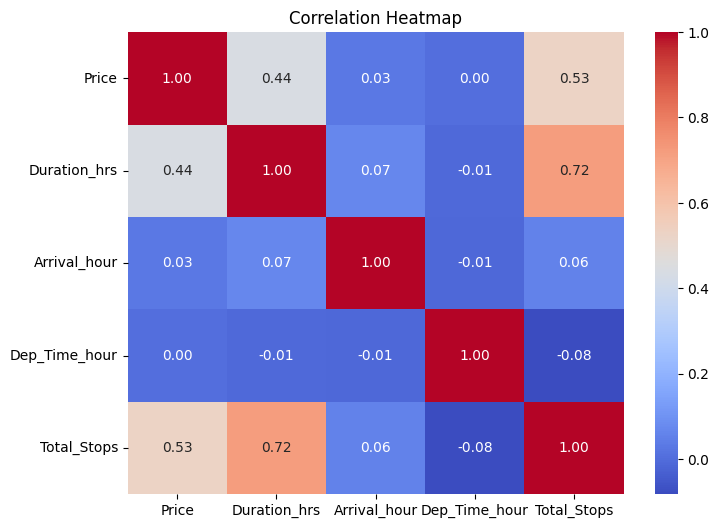

In [88]:
# Calculating correlation matrix
corr = df[['Price', 'Duration_hrs', 'Arrival_hour', 'Dep_Time_hour', 'Total_Stops']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


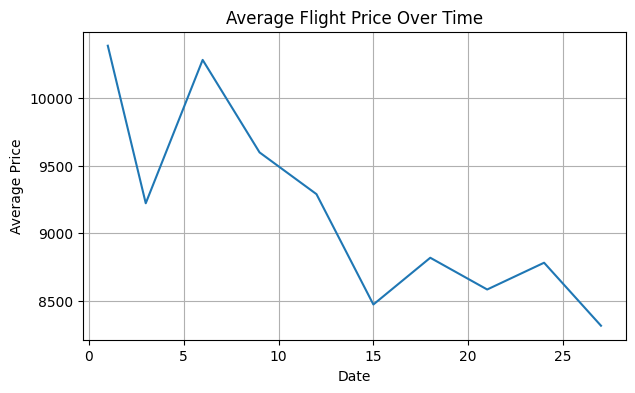

In [89]:
# Plotting time series of average price
plt.figure(figsize=(7, 4))
df.groupby('Date')['Price'].mean().plot()
plt.title('Average Flight Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


# Flight Count by Airline and Month

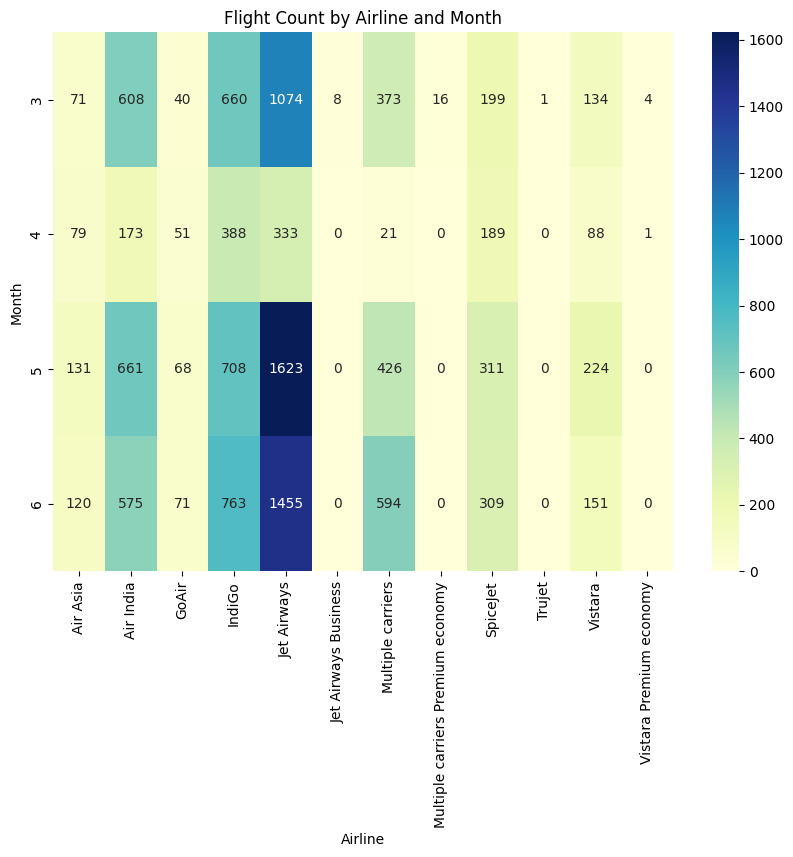

In [96]:
# Convert the pivot table values to integers
pivot_flights_by_airline_month = pivot_flights_by_airline_month.fillna(0).astype(int)

# Plotting the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_flights_by_airline_month, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Flight Count by Airline and Month')
plt.xlabel('Airline')
plt.ylabel('Month')
plt.show()


# Based on the visualizations and analyses performed on the flight dataset, 
here are the ***key insights and conclusions:***



### 1. **Price Variation by Airline**
   - **Insight**: Different airlines have varying average prices. For instance, Jet Airways tends to have higher average prices,
                  while airlines like SpiceJet and IndiGo generally offer more affordable options.

### 2. **Total Flights by Source**
   - **Insight**: The distribution of flights from different sources reveals that certain cities, like Banglore and Kolkata, are major flight hubs.

### 3. **Flight Duration and Price Relationship**
   - **Insight**: The scatter plot shows a positive correlation between flight duration and price, especially when there are more stops. 
                 Longer flights or those with multiple stops tend to be more expensive.

### 4. **Monthly Trends**
   - **Insight**: Flights are not evenly distributed across months. Certain months, like May, see more flights, 
                    possibly due to holiday seasons or other factors.

### 5. **Impact of Stops on Price**
   - **Insight**: Flights with more stops tend to be priced higher, likely due to the increased travel time and associated operational costs.

### 6. **Pairwise Relationships**
   - **Insight**: Pairwise analysis reveals that arrival and departure times, along with flight duration, 
                 have a moderate impact on pricing. Flights departing at certain times might be priced differently.
     

### 7. **Correlation Between Variables**
   - **Insight**: The correlation heatmap highlights that price is moderately correlated with the number of stops and flight duration.
                  However, there is little correlation between price and specific departure/arrival hours.

### 8. **Price Distribution**
   - **Insight**: The distribution of flight prices shows that most flights fall within a specific price range, with fewer flights at the extremes.

### Final Recommendation:
To enhance customer satisfaction and optimize revenue, airlines should:
- Offer a range of services, balancing between cost and luxury, to cater to different market segments.
- Focus on key travel hubs and peak months for promotions.
- Encourage direct flights for budget-conscious travelers.
- Use data-driven insights to refine pricing strategies, especially considering the number of stops and flight duration.

This analysis provides a foundational understanding of the flight market, guiding both business strategy and customer decision-making.